### Notebook to deploy trained random forest regression model to predict diatom carbon biomass

In [ ]:
#pip install sklearn-xarray

In [ ]:
#pip install xarray

In [ ]:
#pip install netcdf4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr

from sklearn.ensemble import RandomForestRegressor

# library for save and load scikit-learn models
import pickle

In [3]:
# load model
filename = "../model_output/random_forest.pickle_noLat"

loaded_model = pickle.load(open(filename, "rb"))

In [4]:
#ds = xr.open_dataset('A20161372016144.L3m_8D_CHL_chlor_a_4km.nc') 

In [5]:
chl_ds = xr.open_dataset('sat_data/AQUA_MODIS.20160516_20160523.L3m.8D.CHL.chlor_a.4km.nc')

In [6]:
chl_ds.chlor_a

<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)>
[37324800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

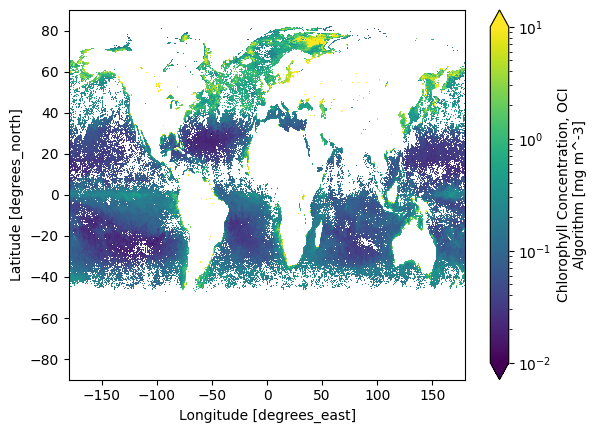

In [71]:
chl_ds.chlor_a.plot(x="lon",  norm=LogNorm(vmin=0.01, vmax=10));

In [133]:
baseline_preds = 1.5*chl_ds.chlor_a**1.9

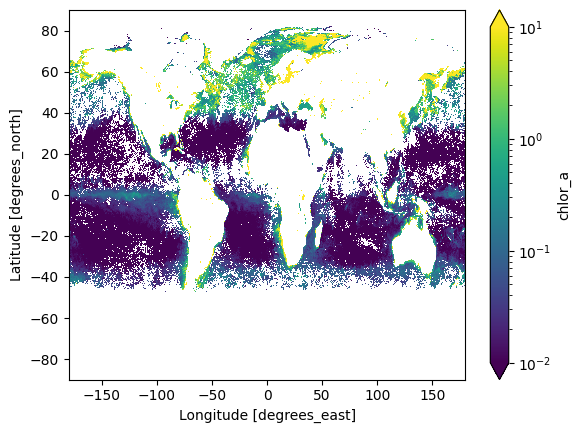

In [134]:
baseline_preds.plot(x="lon",  norm=LogNorm(vmin=0.01, vmax=10));

In [7]:
sst_ds = xr.open_dataset('sat_data/AQUA_MODIS.20160516_20160523.L3m.8D.SST.sst.4km.nc')
bbp_ds = xr.open_dataset('sat_data/AQUA_MODIS.20160516_20160523.L3m.8D.IOP.bbp_443.4km.nc')

In [8]:
sst_ds

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.SST...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   8-day
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        16908859
    data_minimum:                     -1.8
    data_maximum:                     39.985

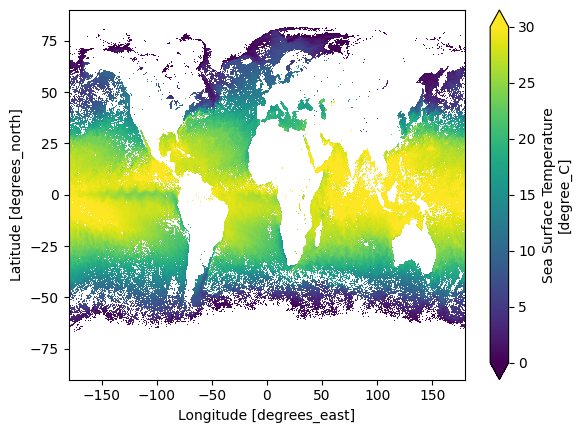

In [138]:
sst_ds.sst.plot(x="lon", vmin=0, vmax=30)

In [9]:
bbp_ds

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    bbp_443  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.IOP...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        11990263
    data_minimum:                     -5.9992075e-05
    data_maximum:                     0.047630005

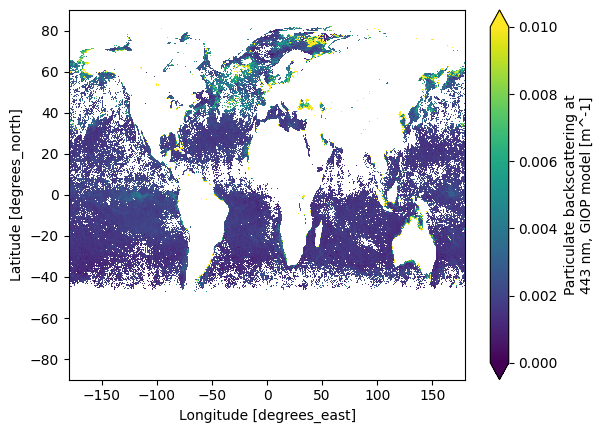

In [139]:
bbp_ds.bbp_443.plot(x='lon', vmin=0, vmax=0.01)

In [10]:
# concatenate the three datasets of variables into one dataset
ds = xr.merge([chl_ds,sst_ds,bbp_ds], compat='override')

In [11]:
ds

<xarray.Dataset>
Dimensions:   (lat: 6811, lon: 13674, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 -89.98 -89.98 -89.94 -89.9 ... 89.9 89.9 89.94 89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    palette   (rgb, eightbitcolor) uint8 ...
    sst       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual_sst  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    bbp_443   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        12142689
    data_minimum:                     0.0024211504
    data_maximum:                     86.086975

In [155]:
data_sst = ds['sst'].values  #,'chlor_a','bbp_443'
# Reshape the 2D variable into a 2D NumPy array
sst_reshaped = data_sst.reshape(-1, data_sst.shape[-1])

data_chla = ds['chlor_a'].values  #,'chlor_a','bbp_443'
# Reshape the 2D variable into a 2D NumPy array
chla_reshaped = data_chla.reshape(-1, data_chla.shape[-1])

data_bbp = ds['bbp_443'].values  #,'chlor_a','bbp_443'
# Reshape the 2D variable into a 2D NumPy array
bbp_reshaped = data_bbp.reshape(-1, data_bbp.shape[-1])

In [154]:
satellite_data_reshaped.shape

(6811, 13674)

In [86]:
lats = abs(ds.lat.to_numpy())
sst = ds.sst.to_numpy()
chla = ds.chlor_a.to_numpy()
bbp = ds.bbp_443.to_numpy()

In [87]:
lats

array([89.97918 , 89.97917 , 89.93751 , ..., 89.895836, 89.9375  ,
       89.979164], dtype=float32)

In [88]:
# repeat the latitude array so that it is the same size as the variable arrays
lat = np.repeat(lats[np.newaxis], 13674)
lat

array([89.97918 , 89.97918 , 89.97918 , ..., 89.979164, 89.979164,
       89.979164], dtype=float32)

In [89]:
sst.shape

(6811, 13674)

In [142]:
lat = lat.flatten()
sst = sst.flatten()
chla = chla.flatten()
bbp = bbp.flatten()

In [143]:
lat

array([89.97918 , 89.97918 , 89.97918 , ..., 89.979164, 89.979164,
       89.979164], dtype=float32)

In [144]:
sst.shape

(93133614,)

In [145]:
chla.shape

(93133614,)

In [146]:
bbp.size

93133614

In [21]:
inputs = np.dstack((sst,chla,bbp)) #lat,

In [22]:
inputs.shape

(1, 93133614, 3)

In [23]:
inputs = np.squeeze(inputs)

In [24]:
inputs.shape

(93133614, 3)

In [30]:
test = pd.DataFrame(inputs)
test

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
93133609,NaN,NaN,NaN
93133610,NaN,NaN,NaN
93133611,NaN,NaN,NaN
93133612,NaN,NaN,NaN


In [33]:
# store dropped rows in a different data frame
dropped_rows = test[test.isna().any(axis=1)]
cleaned_df = test.dropna()

In [34]:
pred = loaded_model.predict(cleaned_df)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
pred = pd.DataFrame(pred)

In [48]:
dropped_rows

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
93133609,NaN,NaN,NaN
93133610,NaN,NaN,NaN
93133611,NaN,NaN,NaN
93133612,NaN,NaN,NaN


In [43]:
foo = dropped_rows[0]
foo.shape

(91580019,)

In [116]:
# add dropped rows back to the dataframe with indexing preserved
pred_df = pd.concat([pred, dropped_rows[0]], ignore_index=False)

In [117]:
sorted_df = pred_df.sort_index()

In [118]:
sorted_df = np.squeeze(sorted_df)
sorted_df.shape

(93133614,)

In [119]:
foo = sorted_df.to_numpy()

In [120]:
foo.shape

(93133614,)

In [121]:
diat = np.reshape(foo, (6811, 13674))

In [122]:
diat.shape

(6811, 13674)

In [123]:
ds

<xarray.Dataset>
Dimensions:   (lat: 6811, lon: 13674, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 -89.98 -89.98 -89.94 -89.9 ... 89.9 89.9 89.94 89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    palette   (rgb, eightbitcolor) uint8 ...
    sst       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual_sst  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    bbp_443   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    diat      (lat, lon) float64 1.042 1.483 1.577 1.541 ... nan nan nan nan
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        12142689
    data_minimum:                     0.0024211504
    data_maximum:                     86.086975

In [124]:
diatx = xr.DataArray(diat)

In [125]:
diatx

<xarray.DataArray (dim_0: 6811, dim_1: 13674)>
array([[1.04168735,        nan, 1.48304465, ..., 1.10354388,        nan,
        0.70494137],
       [       nan, 0.55226961,        nan, ..., 0.59187782,        nan,
        0.58064465],
       [       nan, 0.67537771,        nan, ..., 1.00199041, 0.93685922,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Dimensions without coordinates: dim_0, dim_1

In [126]:
test = ds.chlor_a.copy(data=diatx)

In [127]:
test = test.rename('diat')

In [128]:
test

<xarray.DataArray 'diat' (lat: 6811, lon: 13674)>
array([[1.04168735,        nan, 1.48304465, ..., 1.10354388,        nan,
        0.70494137],
       [       nan, 0.55226961,        nan, ..., 0.59187782,        nan,
        0.58064465],
       [       nan, 0.67537771,        nan, ..., 1.00199041, 0.93685922,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * lat      (lat) float32 -89.98 -89.98 -89.94 -89.9 ... 89.9 89.9 89.94 89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [129]:
ds.sst

<xarray.DataArray 'sst' (lat: 6811, lon: 13674)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.98 -89.98 -89.94 -89.9 ... 89.9 89.9 89.94 89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0

In [130]:
ds = ds.assign(diat=test)

In [131]:
ds

<xarray.Dataset>
Dimensions:   (lat: 6811, lon: 13674, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 -89.98 -89.98 -89.94 -89.9 ... 89.9 89.9 89.94 89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    palette   (rgb, eightbitcolor) uint8 ...
    sst       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual_sst  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    bbp_443   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    diat      (lat, lon) float64 1.042 nan 1.483 nan 1.577 ... nan nan nan nan
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        12142689
    data_minimum:                     0.0024211504
    data_maximum:                     86.086975

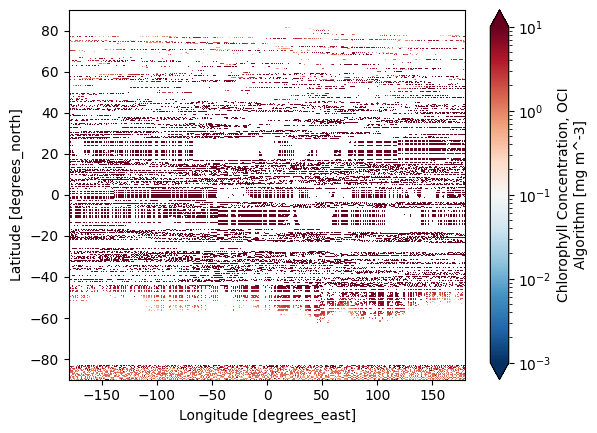

In [132]:
ds.diat.plot(x="lon",  norm=LogNorm(vmin=0.001, vmax=10))

In [ ]:
# use wrappers to combine sklearn and xarray
from sklearn_xarray import wrap

In [113]:

# Create a sample DataFrame
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, np.nan, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# Step 1: Remove Rows with NaN Values
df_without_nan = df.dropna()

# Step 2: Store Removed Rows
nan_mask = df.isna().any(axis=1)
removed_rows = df[nan_mask].copy()

# Step 3: Add Removed Rows Back
df_with_nan_restored = pd.concat([df_without_nan, removed_rows])

print(df_with_nan_restored)


     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12
1  2.0  NaN  10
2  NaN  NaN  11


In [114]:
sorted_df = df_with_nan_restored.sort_index()

In [115]:
sorted_df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,NaN,11
3,4.0,8.0,12
